In [2]:
import networkx as nx
import matplotlib.pyplot as plt

[1.0, 0.5, 0.5, 0.0]


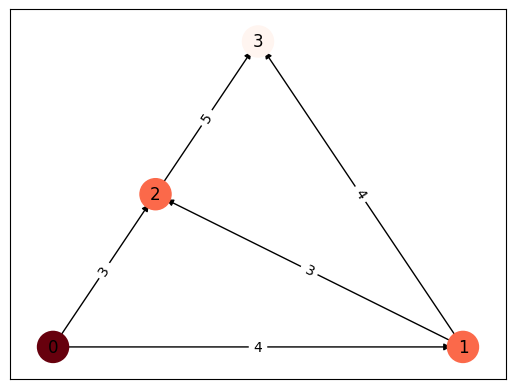

In [3]:
graph = nx.DiGraph()

graph.add_weighted_edges_from([('0', '1', 4), ('0', '2', 3), ('1', '2', 3), ('1', '3', 4), ('2', '3', 5)])
labels = nx.get_edge_attributes(graph, 'weight')
val_map = {'0' : 1.00, '3': 0.00}
values = [val_map.get(nodes, 0.5) for nodes in graph.nodes()]
print(values)
pos = nx.planar_layout(graph)

nx.draw_networkx_nodes(graph, pos, node_size=500, cmap=plt.get_cmap('Reds'), node_color=values)
nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), edge_color='black')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
nx.draw_networkx_labels(graph, pos)
plt.show()

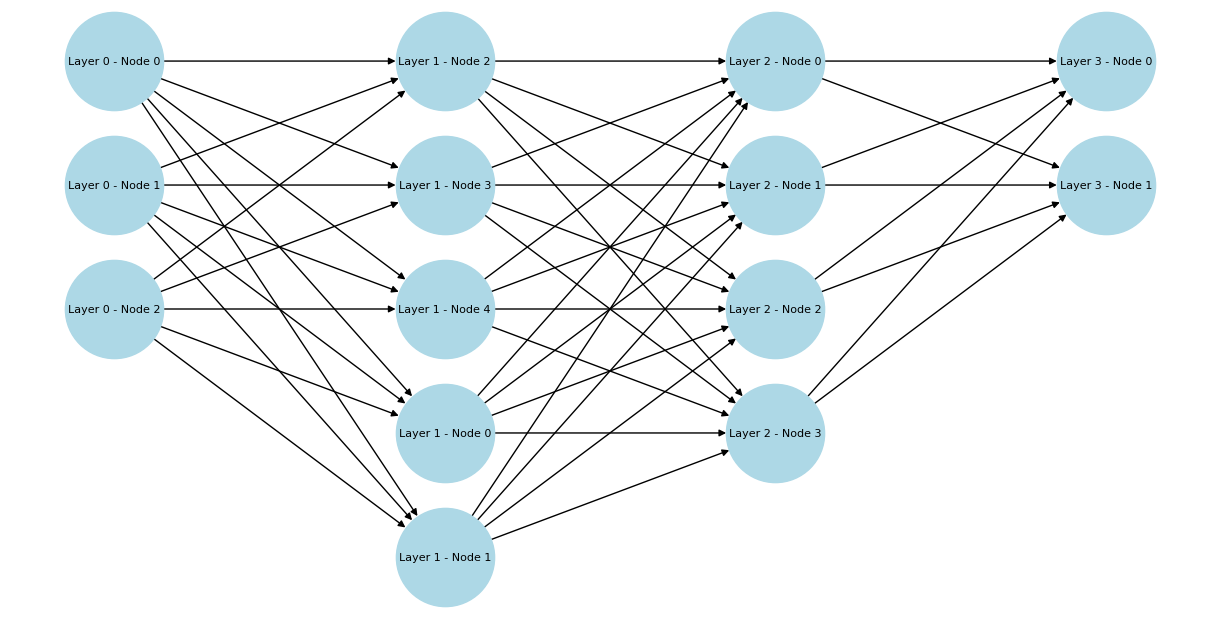

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to create and plot the neural network
def plot_neural_network(layers):
    G = nx.DiGraph()

    # Create nodes for each layer
    node_labels = {}
    node_count = 0
    for layer_idx, layer_size in enumerate(layers):
        for node_idx in range(layer_size):
            node_labels[node_count] = f'Layer {layer_idx} - Node {node_idx}'
            G.add_node(node_count, layer=layer_idx)
            node_count += 1

    # Create edges between layers
    node_count = 0
    for layer_idx in range(len(layers) - 1):
        for src in range(layers[layer_idx]):
            for dst in range(layers[layer_idx + 1]):
                G.add_edge(node_count + src, node_count + layers[layer_idx] + dst)
        node_count += layers[layer_idx]

    # Get position for each node
    pos = {}
    layer_height = 1.0 / (max(layers) - 1)
    for node, data in G.nodes(data=True):
        layer_idx = data['layer']
        layer_width = layers[layer_idx]
        x = layer_idx
        y = 1 - (node % layer_width) * layer_height
        pos[node] = (x, y)

    # Draw the network
    plt.figure(figsize=(12, 6))
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=5000, node_color='lightblue', font_size=8)
    plt.show()

# Define the layers of the neural network
layers = [3, 5, 4, 2]

# Plot the neural network
plot_neural_network(layers)


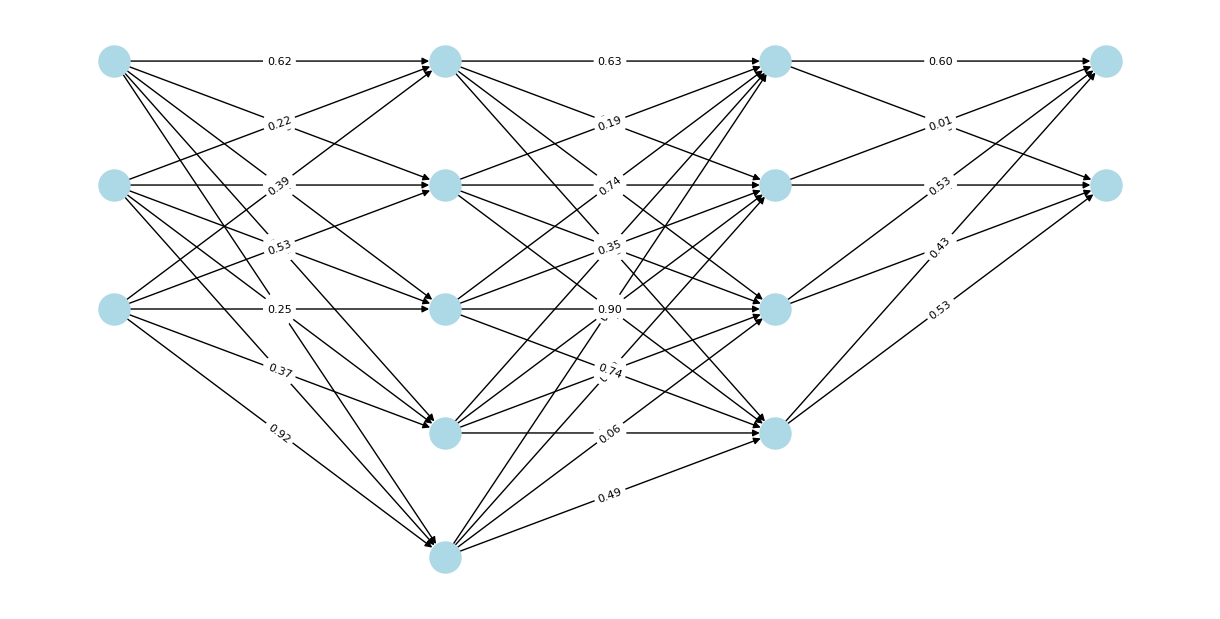

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Function to create and plot the neural network with weights
def plot_neural_network_with_weights(layers):
    G = nx.DiGraph()

    # Create nodes for each layer
    node_count = 0
    for layer_idx, layer_size in enumerate(layers):
        for node_idx in range(layer_size):
            G.add_node(node_count, layer=layer_idx)
            node_count += 1

    # Create edges between layers with random weights
    weights = {}
    node_count = 0
    for layer_idx in range(len(layers) - 1):
        for src in range(layers[layer_idx]):
            for dst in range(layers[layer_idx + 1]):
                weight = np.random.rand()  # Generate a random weight
                G.add_edge(node_count + src, node_count + layers[layer_idx] + dst, weight=weight)
        node_count += layers[layer_idx]

    # Get position for each node
    pos = {}
    layer_height = 1.0 / (max(layers) - 1)
    for node, data in G.nodes(data=True):
        layer_idx = data['layer']
        layer_width = layers[layer_idx]
        x = layer_idx
        y = 1 - (node % layer_width) * layer_height
        pos[node] = (x, y)

    # Draw the network
    plt.figure(figsize=(12, 6))
    edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}
    nx.draw(G, pos, with_labels=False, node_size=500, node_color='lightblue')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    plt.show()

# Define the layers of the neural network
layers = [3, 5, 4, 2]

# Plot the neural network with weights
plot_neural_network_with_weights(layers)


In [6]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPUs detected:", tf.config.list_physical_devices('GPU'))



2024-10-14 19:20:30.183060: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-10-14 19:20:32.390731: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TensorFlow version: 2.13.1
GPUs detected: []


2024-10-14 19:20:36.215409: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
import os
os.environ['XLA_FLAGS'] = '--xla_gpu_cuda_data_dir=/ediss_data/ediss4/sarosh/anaconda3/envs/snn/lib/nvvm/libdevice/'

import tensorflow as tf
#tf.config.optimizer.set_jit(False)  # Disable XLA JIT

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(42) 

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a simpler model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model with validation split
model.fit(x_train, y_train, epochs=5, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5440 - accuracy: 0.8421 - val_loss: 0.3067 - val_accuracy: 0.9101
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3058 - accuracy: 0.9119 - val_loss: 0.2627 - val_accuracy: 0.9246
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2737 - accuracy: 0.9197 - val_loss: 0.2450 - val_accuracy: 0.9303
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2517 - accuracy: 0.9270 - val_loss: 0.2386 - val_accuracy: 0.9314
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2355 - accuracy: 0.9330 - val_loss: 0.2217 - val_accuracy: 0.9377
313/313 - 0s - loss: 0.2240 - accuracy: 0.9346 - 365ms/epoch - 1ms/step

Test accuracy: 0.9345999956130981


[12, 12, 10]


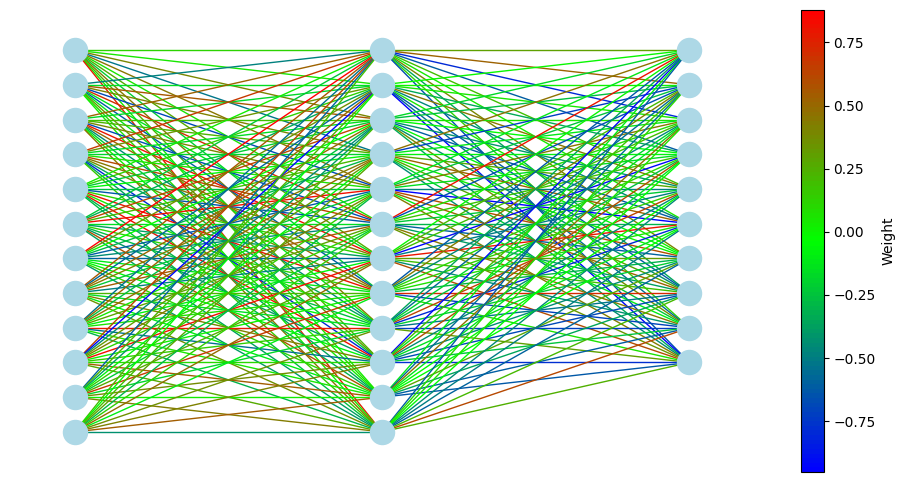

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Function to create and plot the neural network with weights and colored edges
def plot_neural_network_with_colored_weights(layers, weight_mat, threshold):
    G = nx.DiGraph()

    # Create nodes for each layer
    node_count = 0
    for layer_idx, layer_size in enumerate(layers):
        for node_idx in range(layer_size):
            G.add_node(node_count, layer=layer_idx)
            node_count += 1

    # Create edges between layers with random weights
    weights = {}
    node_count = 0
    for layer_idx in range(len(layers) - 1):
        for src in range(layers[layer_idx]):
            for dst in range(layers[layer_idx + 1]):
                weight = weight_mat[layer_idx][dst][src]  # Generate a random weight

                if abs(weight) > threshold:
                    G.add_edge(node_count + src, node_count + layers[layer_idx] + dst, weight=weight)
        node_count += layers[layer_idx]

    # Get position for each node
    pos = {}
    layer_height = 1.0 / (max(layers) - 1)
    for node, data in G.nodes(data=True):
        layer_idx = data['layer']
        layer_width = layers[layer_idx]
        x = layer_idx
        y = 1 - (node % layer_width) * layer_height
        pos[node] = (x, y)

    # Extract the edge weights
    weights = [d['weight'] for u, v, d in G.edges(data=True)]

    # Normalize weights for colormap
    norm = plt.Normalize(min(weights), max(weights))
    # Create a custom colormap with green in the middle
    colors = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]  # Blue, Green, Red
    cmap_name = 'blue_green_red'
    cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

    # Draw the network
    plt.figure(figsize=(12, 6))
    edges = nx.draw_networkx_edges(G, pos, edge_color=weights, edge_cmap=cmap, edge_vmin=min(weights), edge_vmax=max(weights), arrows=False)
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightblue')

    # Add colorbar
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=plt.gca())
    cbar.set_label('Weight')

    plt.axis('off')
    plt.show()

# Extract the model layers and weights
layers = []
weights = []

model_layers = model.layers
model_layers = model_layers[1:]
layers.append(model_layers[0].get_weights()[0].T.shape[0])
for i in range(1, len(model_layers)):
    layer_weights = model_layers[i].get_weights()
    if layer_weights:
        weights.append(layer_weights[0].T)
        layers.append(weights[-1].shape[0])

print(layers)

# Plot the neural network with colored weights
plot_neural_network_with_colored_weights(layers, weights, threshold=0.3)
